# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [133]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [116]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [117]:
#your code here
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [118]:
#your code here
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value.

In [119]:
#your code here
drop_rows = spaceship[spaceship.isna().sum(axis=1) > 0]
drop_rows.index
spaceship.drop(drop_rows.index, inplace=True)
spaceship.reset_index(drop=True,inplace=True)
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
6602,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
6603,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
6604,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [120]:
#your code here
spaceship['Cabin'] = spaceship['Cabin'].str.split('/').str[0]
spaceship['Cabin'].unique()

array(['B', 'F', 'A', 'G', 'E', 'C', 'D', 'T'], dtype=object)

- Drop PassengerId and Name

In [121]:
#your code here
features = spaceship.drop(['PassengerId', 'Name','Transported'], axis=1)
target = spaceship.Transported

- For non-numerical columns, do dummies.

In [122]:
# Get non-numeric features encoded via encoding via object index in unique()
def encode_via_index(features_df):
    non_num_features = features_df.select_dtypes(include='object')

    # Create a dictionary to map unique values to their index
    non_num_dict = {col: {val: idx for idx, val in enumerate(np.sort(non_num_features[col].unique()) ) } for col in non_num_features.columns}

    # Convert categorical variables to numerical based on the index from unique values
    for col in non_num_features.columns:
        non_num_features[col] = non_num_features[col].map(non_num_dict[col])
    return non_num_features

non_num_encoded = encode_via_index(features)

# cat_cols = features.select_dtypes(include='object').columns
# features[cat_cols] = non_num_encoded
# features[cat_cols]

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,1,0,1,2,0
1,0,0,5,2,0
2,1,0,0,2,1
3,1,0,0,2,0
4,0,0,5,2,0
...,...,...,...,...,...
6601,1,0,0,0,1
6602,0,1,6,1,0
6603,0,0,6,2,0
6604,1,0,4,0,0


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# def encode_via_one_hot(features_df):
#     non_num_features = features_df.select_dtypes(include='object')

#     encoder = OneHotEncoder(drop='first').fit(X_train_cat)

**Perform Train Test Split**

In [123]:
#your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [124]:
#your code here
from sklearn.neighbors import KNeighborsClassifier

Fit the model to your data.

In [125]:
knn = KNeighborsClassifier()

In [126]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

- Evaluate your model's performance. Comment it

In [127]:
#your code here
knn.score(X_test, y_test)

0.7753403933434191

In [128]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [129]:
pred = knn.predict(X_test)
print(f"Precision:",{precision_score(y_test, pred, zero_division=0)})
print(f"Accuracy:",{accuracy_score(y_test, pred)})
print(f"Recall:",{recall_score(y_test, pred)})
print(f"F1:",{f1_score(y_test, pred)})

Precision: {0.78}
Accuracy: {0.7753403933434191}
Recall: {0.7670196671709532}
F1: {0.7734553775743708}


In [141]:
# Do dummies using one-hot encoding into int 1 or 0
# spaceship = pd.get_dummies(spaceship, drop_first=True)

# # Convert all boolean columns to integers
# boolean_columns = spaceship.select_dtypes(include=['bool']).columns
# spaceship[boolean_columns] = spaceship[boolean_columns].astype(int)

# spaceship.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId_0002_01,PassengerId_0003_01,PassengerId_0003_02,...,Name_Zinonon Veriedeezy,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Pasharne
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


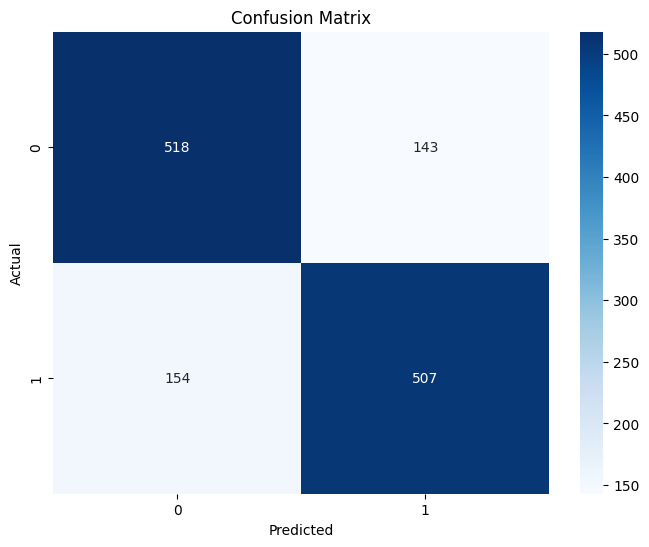

In [140]:
LR_confusion_matrix = confusion_matrix(y_test,pred)  #Always Actual,Predicted

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(LR_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()